In [7]:
# Make sure we can display multiple results without calling print :)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# Take a look at the dataset

import pandas as pd

train = pd.read_csv('./data/train.csv')

train.shape
train.info()

(14993, 24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [9]:
train.sample(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
8169,1,NaN,4,307,0,2,7,0,0,2,...,1,1,0,41326,57bf6a3c36cd0cfa0ec12e6fb56907ba,0,Playfull healthy dog with no aggressive behavi...,8dfb61116,2.0,4
6957,1,Mini Pinchies,3,152,0,2,1,2,0,1,...,1,1,100,41326,4069c2c89855c4b8dcea34c0f3416e11,0,We have two really cute and active Mini Pinchi...,c14530f38,2.0,1
10176,2,Smokey Grey Kitten 3months,3,289,266,2,6,0,0,2,...,1,1,0,41326,efa9a4be1e2e903503540f01db1766f3,0,mixed dsh+russian blue kitten 3 months old kit...,7ec0f1e9e,4.0,3
2008,1,Lucky,4,307,0,2,1,7,0,2,...,1,1,0,41401,2a3357d5dd45a7a34d1c72d000d95d16,0,"Super Adorable and well behaved, doesn't bark ...",8fc22fd2c,5.0,4
6690,2,Ree Ree,10,266,0,1,1,7,0,3,...,1,1,0,41336,45146cbdb40dc3623587ff2204a72612,0,"Very active and healthy. I have too many cats,...",7a58cfb6e,1.0,2


In [10]:
train['AdoptionSpeed'].value_counts()

4    4197
2    4037
3    3259
1    3090
0     410
Name: AdoptionSpeed, dtype: int64

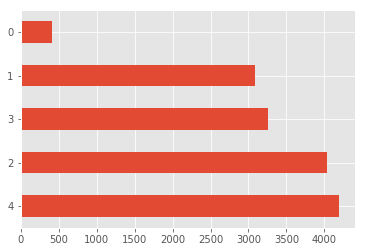

In [11]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

train['AdoptionSpeed'].value_counts().plot.barh();

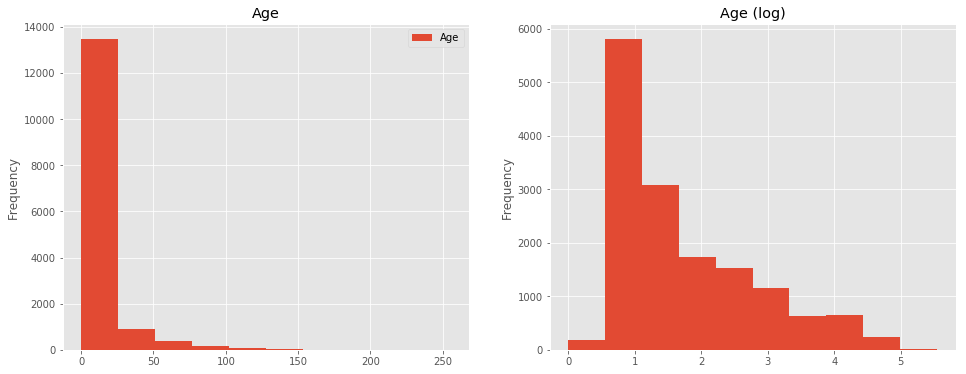

In [12]:
import numpy as np

fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title('Age');
train['Age'].plot('hist');
plt.legend();

plt.subplot(1, 2, 2)
plt.title('Age (log)');
np.log1p(train['Age']).plot('hist');

In [13]:
train['IsPurebreed'] = train['Breed2'] == 0

train[['IsPurebreed', 'Breed1', 'Breed2']].sample(5)

,IsPurebreed,Breed1,Breed2
12800,False,285,264
3326,True,15,0
9394,True,266,0
2866,True,299,0
4660,True,266,0


In [14]:
print(f"Pure breeds percentage: {train['IsPurebreed'].sum() * 100 / train['IsPurebreed'].shape[0]:.4f}%.")

Pure breeds percentage: 71.7802%.


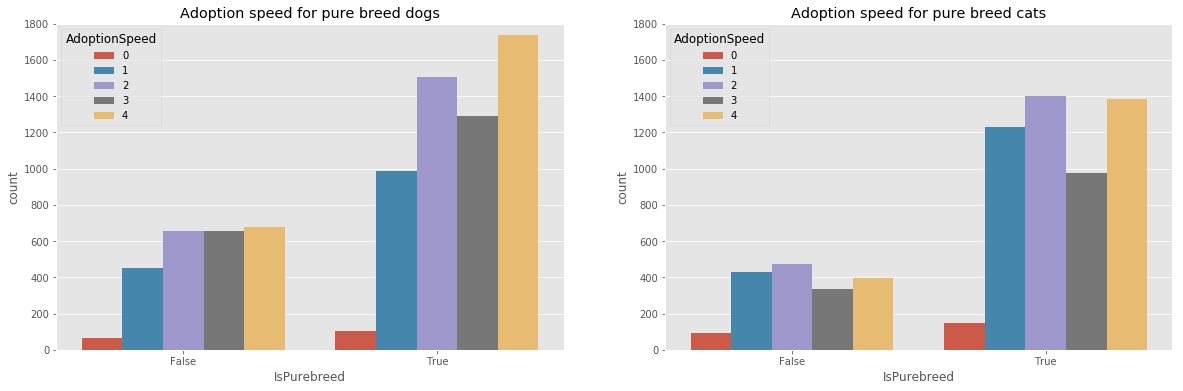

In [15]:
import seaborn as sns

plt.figure(figsize=(20, 6));

plt.subplot(1, 2, 1)
sns.countplot(x='IsPurebreed', data=train.loc[train['Type'] == 1], hue='AdoptionSpeed');
plt.ylim(0, 1800)
plt.title('Adoption speed for pure breed dogs');

plt.subplot(1, 2, 2)
sns.countplot(x='IsPurebreed', data=train.loc[train['Type'] == 2], hue='AdoptionSpeed');
plt.ylim(0, 1800)
plt.title('Adoption speed for pure breed cats');

In [16]:
train['IsFree'] = train['Fee'] == 0
train['IsMulticolor'] = (train['Color2'] != 0) | (train['Color3'] != 0)
train[['IsMulticolor', 'Color1', 'Color2', 'Color3']].sample(5)

,IsMulticolor,Color1,Color2,Color3
914,True,1,4,6
1977,True,1,2,0
14533,True,2,7,0
12179,True,1,6,0
11949,False,2,0,0


In [17]:
categorical_columns = ['Type', 'Breed1', 'Breed2', 'Gender', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health',
                       'Color1', 'Color2', 'Color3', 'IsPurebreed', 'IsFree', 'IsMulticolor']
for col in categorical_columns:
    train[col] = train[col].astype('category')
    
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 27 columns):
Type             14993 non-null category
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null category
Breed2           14993 non-null category
Gender           14993 non-null category
Color1           14993 non-null category
Color2           14993 non-null category
Color3           14993 non-null category
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         1

In [18]:
train.describe(include='all')

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,IsPurebreed,IsFree,IsMulticolor
count,14993.0,13736,14993.000000,14993.0,14993.0,14993.0,14993.0,14993.0,14993.0,14993.000000,...,14993.000000,14993,14993.000000,14981,14993,14993.000000,14993.000000,14993,14993,14993
unique,2.0,9060,NaN,176.0,135.0,3.0,7.0,7.0,6.0,NaN,...,NaN,5595,NaN,14032,14993,NaN,NaN,2,2,2
top,1.0,Baby,NaN,307.0,0.0,2.0,1.0,0.0,0.0,NaN,...,NaN,fa90fa5b1ee11c86938398b60abc32cb,NaN,For Adoption,52db8f887,NaN,NaN,True,True,True
freq,8132.0,66,NaN,5927.0,10762.0,7277.0,7427.0,4471.0,10604.0,NaN,...,NaN,459,NaN,164,1,NaN,NaN,10762,12663,10522
mean,NaN,NaN,10.452078,NaN,NaN,NaN,NaN,NaN,NaN,1.862002,...,41346.028347,NaN,0.056760,NaN,NaN,3.889215,2.516441,NaN,NaN,NaN
std,NaN,NaN,18.155790,NaN,NaN,NaN,NaN,NaN,NaN,0.547959,...,32.444153,NaN,0.346185,NaN,NaN,3.487810,1.177265,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,41324.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,41326.000000,NaN,0.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN
50%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,41326.000000,NaN,0.000000,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN
75%,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,41401.000000,NaN,0.000000,NaN,NaN,5.000000,4.000000,NaN,NaN,NaN
